In [2]:
# import functions
# uses astroconda (must activate before attempting this code)
import sys
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit 
from scipy.optimize import leastsq
import os
import astropy.io.fits as fits
import matplotlib.lines as lines
from def_funct import * 
%matplotlib inline

In [3]:
# ----------- List of directories for HST and SPTZ 
# Spitzer
sptz_data_directory = "/Users/melaniapena/Rsrch/Data/SpitzerData/SPITZER_PHOTOMETRY_1629+03.txt"
# HST
hst_data_directory = "/Users/melaniapena/Rsrch/Data/HST_data/virtualdatanew.txt"

#   Once the fourier fit and flux of the HST and Spitzer is plotted onto the same graph, the figure will be saved 
#   into a directory. If needed.
save_figure = "/Users/melaniapena/Rsrch/code/2017_fall_semester/data/Int_Amp_Dec_21_17/HST_SPTZ_fit_and_ori_data.png"


# ----------- List of directories for Intensities and nonexistent directory
#   File that opens the needed intensity files
file_dir_Int_models = "/Users/melaniapena/Rsrch/code/2017_fall_semester/data/Int_Amp_Dec_21_17/Intensities(DNT)"

#   this is a nonexistent directory. However, path.exists creates the new directory folder.
save_dir = "/Users/melaniapena/Rsrch/code/2017_fall_semester/data/Int_Amp_Dec_21_17/(pdf)_plotted_model_amplitudes/" 
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [4]:
# ----------- Reading in ascii

# ----------- Spitzer
# SPITZER DATA written as an ascii file
data_SPTZ = ascii.read(sptz_data_directory)

# saves the ascii arrays into a specified variable
bmjd_SPTZ = data_SPTZ["BMJD"]
flux_SPTZ = data_SPTZ["FLUX"]
flux_err_SPTZ = data_SPTZ["FLUX_ERR"]
x_cen_SPTZ = data_SPTZ["X_CENTROID"]
y_cen_SPTZ = data_SPTZ["Y_CENTROID"]


# ----------- HST
# HUBBLE SPACE DATA written as an ascii file
data_HST = ascii.read(hst_data_directory)

# saves the ascii arrays into a specified variable
bmjd_HST = data_HST['Midtime']
J_band_flux_HST = data_HST['J_band(ergs/(s*cm^2))']
J_band_flux_err_HST = data_HST['JBandError']
H_band_flux_HST = data_HST['H_band(ergs/(s*cm^2))']
H_band_flux_err_HST = data_HST['HBandError']
W_band_flux_HST = data_HST['W_band(ergs/(s*cm^2))']
W_band_flux_err_HST = data_HST['WBandError']

In [5]:
# look into understanding how the time was found
hour_SPTZ = time_converter(bmjd_SPTZ)

In [6]:
# ----------- Spitzer data

#   Divides the flux array with its own median 
flux_med_SPTZ = (flux_SPTZ / np.nanmedian(flux_SPTZ))
flux_err_med_SPTZ =  (flux_err_SPTZ / np.nanmedian(flux_SPTZ))

# --- Masking points withn Spitzer flux and time array
#   The Spitzer data contains a lot of data points. Some points
#   are shown far off from the rest of the data points.
#   We use sigma clipping to mask those specific points and 
#   alter the length of the array. We also mask its time point that
#   goes along with the flux point within that array.

#   which lowers the total length of the array for time and flux
#   clipping the median flux array
clip_flux_SPTZ =clip_of_mask_flux(flux_med_SPTZ)
clip_flux_err_SPTZ =clip_of_mask(flux_med_SPTZ,flux_err_med_SPTZ)
clip_hour_SPTZ = clip_of_mask(flux_med_SPTZ,hour_SPTZ)

/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/stats/sigma_clipping.py:165: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/stats/sigma_clipping.py:166: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


In [7]:
print('length of original Spitzer arrays')
print(len(flux_SPTZ))
print(len(flux_err_SPTZ))
print(len(bmjd_SPTZ))

# clipped
print('length of clipped Spitzer arrays')
print(len(clip_flux_SPTZ))
print(len(clip_flux_err_SPTZ))
print(len(clip_hour_SPTZ))

length of original Spitzer arrays
1037
1037
1037
length of clipped Spitzer arrays
1005
1005
1005


/anaconda3/envs/astroconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Text(0,0.5,'Photometric Flux')

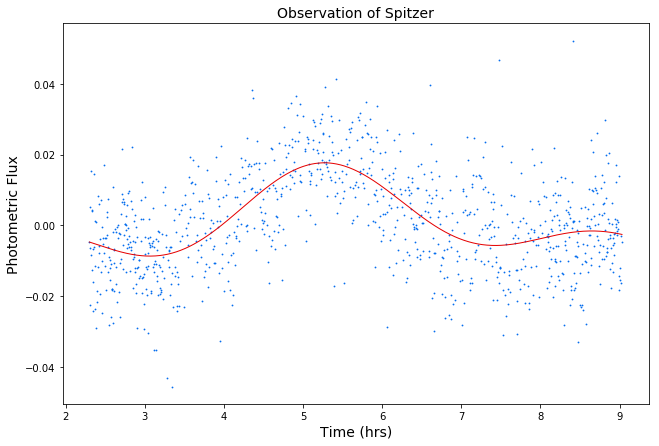

In [8]:
# ----------- Plotting Fourier Fit and flux of Spitzer
#   stretches the graph but does not affect the x and y axis (will be using this constantly)
plt.figure(figsize=(10.5,7))

# --- Plotting Flux
#   plots the clipped flux vs time.
plt.plot(clip_hour_SPTZ,clip_flux_SPTZ,'o',color='xkcd:cerulean blue',markersize=0.8,label='Spitzer Data')

# --- Plotting Fourier Fit
#   guess parameters were given.
guess_twoMode=[1./5.,1./5.,1./5.,1./5.,1./5.,1./5.,0.1,0.]
#   Calculates and plots the Fourier fit of the Spitzer flux
params_SPTZ_twoMode, pcov = curve_fit(fourier_sinusoidal_series_twoModes, clip_hour_SPTZ, clip_flux_SPTZ, p0=guess_twoMode, sigma=clip_flux_err_SPTZ)
SPTZ_plot = plt.plot(clip_hour_SPTZ,fourier_sinusoidal_series_twoModes(clip_hour_SPTZ,*params_SPTZ_twoMode),'-',  color='xkcd:red', linewidth = 1,label = 'Spitzer Fit')

text_title_2 = "Observation of Spitzer"    #   labeling the figure
plt.title(text_title_2 ,fontsize = 14)
plt.xlabel('Time (hrs)', fontsize = 14)      
plt.ylabel('Photometric Flux',fontsize = 14)

In [9]:
# ----------- HST data

#   Converting julian into hours and since hst data has gap data we fill in the gaps with numpy linespace
times_hst = time_converter(bmjd_HST)
times_int_hst = np.linspace(min(times_hst), max(times_hst),num=80)


#   Setting the HST data to Zero so it aligns with the SPITZER data.
#   Divides the flux array with its own median for each band.
J_flux_med_HST = (J_band_flux_HST/ np.median(J_band_flux_HST))
H_flux_med_HST = (H_band_flux_HST / np.median(H_band_flux_HST))
W_flux_med_HST = (W_band_flux_HST / np.median(W_band_flux_HST))

J_flux_err_med_HST =  (J_band_flux_err_HST/ np.median(J_band_flux_HST))
H_flux_err_med_HST =  (H_band_flux_err_HST/ np.median(H_band_flux_HST))
W_flux_err_med_HST =  (W_band_flux_err_HST/ np.median(W_band_flux_HST))

In [10]:
print('length of HST arrays')
print(len(J_flux_med_HST))
print(len(H_flux_med_HST))
print(len(W_flux_med_HST))
print(len(times_hst))

length of HST arrays
80
80
80
80


/anaconda3/envs/astroconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(0, 5.3)

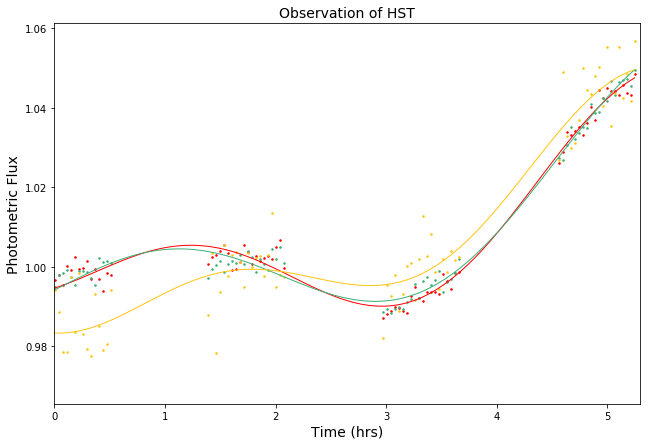

In [11]:
# ----------- Plotting Fourier Fit and flux of HST

# --- Plotting Flux
#   plots flux vs time.
plt.figure(figsize=(10.5,7))
plt.plot(times_hst,J_flux_med_HST,'or',markersize=1.5,label='Hubble J-Band Data')
plt.plot(times_hst,H_flux_med_HST,'o',color='xkcd:dark seafoam green',markersize=1.5,label='Hubble H-Band Data')
plt.plot(times_hst,W_flux_med_HST,'o',color='xkcd:sunflower',markersize=1.5,label='Hubble W-Band Data')

# --- Plotting Fourier Fit
#   guess parameters were given.
guess_twoMode=[1./5.,1./5.,1./5.,1./5.,1./5.,1./5.,0.1,0.]
# Finds the fourier fit of HST
params_J_HST_twoMode, pcov = curve_fit(fourier_sinusoidal_series_twoModes, times_hst, J_flux_med_HST, p0=guess_twoMode, sigma=J_flux_err_med_HST)
params_H_HST_twoMode, pcov = curve_fit(fourier_sinusoidal_series_twoModes, times_hst, H_flux_med_HST, p0=guess_twoMode, sigma=H_flux_err_med_HST)
params_W_HST_twoMode, pcov = curve_fit(fourier_sinusoidal_series_twoModes, times_hst, W_flux_med_HST, p0=guess_twoMode, sigma=W_flux_err_med_HST)

# plots the fourier fit models of HST
HST_J_plot, = plt.plot(times_int_hst,fourier_sinusoidal_series_twoModes(times_int_hst,*params_J_HST_twoMode),'r', linewidth = 1,label = 'Hubble J-Band Fit')
HST_H_plot, = plt.plot(times_int_hst,fourier_sinusoidal_series_twoModes(times_int_hst,*params_H_HST_twoMode),'xkcd:dark seafoam green', linewidth = 1,label = 'Hubble H-Band Fit')
HST_W_plot, = plt.plot(times_int_hst,fourier_sinusoidal_series_twoModes(times_int_hst,*params_W_HST_twoMode),'xkcd:sunflower', linewidth = 1,label = 'Hubble W-Band Fit')

text_title_2 = "Observation of HST"       # labeling the figure
plt.title(text_title_2 ,fontsize = 14)
plt.xlabel('Time (hrs)', fontsize = 14)
plt.ylabel('Photometric Flux',fontsize = 14)

# Sets the size range of the graph
plt.xlim(0,5.3)


(0.97, 1.06)

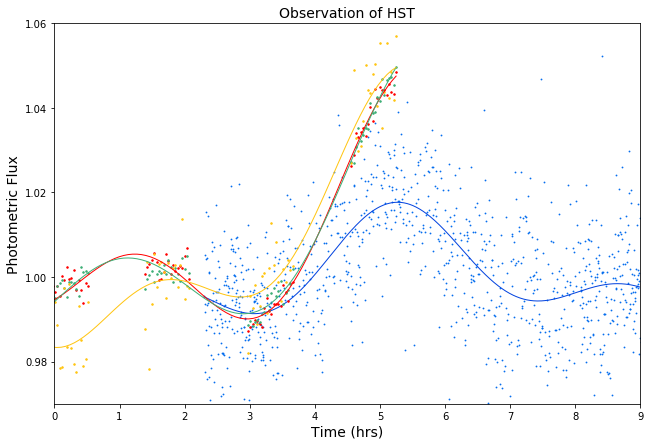

In [12]:
# ----------- Plotting both HST and Spitzer onto the same graph
plt.figure(figsize=(10.5,7))

# ----------- Plotting Fourier Fit and flux of Spitzer
plt.plot(clip_hour_SPTZ,clip_flux_SPTZ+1,'o',color='xkcd:cerulean blue',markersize=0.8,label='Spitzer Data')
SPTZ_plot = plt.plot(clip_hour_SPTZ,fourier_sinusoidal_series_twoModes(clip_hour_SPTZ,*params_SPTZ_twoMode)+1,'-',  color='xkcd:blue', linewidth = 1,label = 'Spitzer Fit')

# ----------- Plotting Fourier Fit and flux of HST
plt.plot(times_hst,J_flux_med_HST,'or',markersize=1.5,label='Hubble J-Band Data')
plt.plot(times_hst,H_flux_med_HST,'o',color='xkcd:dark seafoam green',markersize=1.5,label='Hubble H-Band Data')
plt.plot(times_hst,W_flux_med_HST,'o',color='xkcd:sunflower',markersize=1.5,label='Hubble W-Band Data')

HST_J_plot, = plt.plot(times_int_hst,fourier_sinusoidal_series_twoModes(times_int_hst,*params_J_HST_twoMode),'r', linewidth = 1,label = 'Hubble J-Band Fit')
HST_H_plot, = plt.plot(times_int_hst,fourier_sinusoidal_series_twoModes(times_int_hst,*params_H_HST_twoMode),'xkcd:dark seafoam green', linewidth = 1,label = 'Hubble H-Band Fit')
HST_W_plot, = plt.plot(times_int_hst,fourier_sinusoidal_series_twoModes(times_int_hst,*params_W_HST_twoMode),'xkcd:sunflower', linewidth = 1,label = 'Hubble W-Band Fit')
 
text_title_2 = "Observation of HST"       # labeling the figure
plt.title(text_title_2 ,fontsize = 14)
plt.xlabel('Time (hrs)', fontsize = 14)
plt.ylabel('Photometric Flux',fontsize = 14)

#   Sets the size range of the graph
plt.xlim(0,9)
plt.ylim(0.97,1.06)

#   saves the figure into a directory which is located at the very beginning of this code
# plt.savefig(save_figure,dpi=600, additional_artists=art, bbox_inches="tight")


In [13]:
#   The coding in the "Overlap plot region" just shows the 'only' the overlapped portion of the same graph that
# presented as the HST and Spitzer data. the overlap plot will be commented out unless needed.

# ------------------------------------ Overlap plot region------------------------------------------
# Measure the the amplitudes for each band separately by taking the max and min of the model.
# but when comparing with the Spitzer data, it doesnt quite overlap the whole data model of the HST band models.
# what we want to be able to do is compare the amplitudes only within regions that overlap between the HST and Spitzer.

# find the end and points between the overlap data with both SPITZR and HST bands
startPoint_SPTZ = clip_hour_SPTZ[0]
lastPoint_HST_J = times_int_hst[-1]
lastPoint_HST_H = times_int_hst[-1]
lastPoint_HST_W = times_int_hst[-1]

# Using the where function and if else statement to only have an overlap region of the graph
hst_J_index = np.where(np.logical_and(times_int_hst >= startPoint_SPTZ, times_int_hst <= lastPoint_HST_J))
hst_H_index = np.where(np.logical_and(times_int_hst >= startPoint_SPTZ, times_int_hst <= lastPoint_HST_H))
hst_W_index = np.where(np.logical_and(times_int_hst >= startPoint_SPTZ, times_int_hst <= lastPoint_HST_W))
sptz_index = np.where(np.logical_and(clip_hour_SPTZ >= startPoint_SPTZ, clip_hour_SPTZ <= lastPoint_HST_J))

print(startPoint_SPTZ)
print(lastPoint_HST_J)
print(lastPoint_HST_H)
print(lastPoint_HST_W)

2.30095133325
5.24811359996
5.24811359996
5.24811359996


In [14]:
# ----------- Finding Amplitude of Overlapped Region
sptz_overlap = ((fourier_sinusoidal_series_twoModes(clip_hour_SPTZ,*params_SPTZ_twoMode)+1)[sptz_index])
hst_J_overlap =fourier_sinusoidal_series_twoModes(times_int_hst, *params_J_HST_twoMode)[hst_J_index]
hst_H_overlap =fourier_sinusoidal_series_twoModes(times_int_hst, *params_H_HST_twoMode)[hst_H_index]
hst_W_overlap = fourier_sinusoidal_series_twoModes(times_int_hst, *params_W_HST_twoMode)[hst_W_index]

#   Calculate its Amplitude Region
amp_J_HST = amp_funct(hst_J_overlap)
amp_H_HST = amp_funct(hst_H_overlap)
amp_W_HST = amp_funct(hst_W_overlap)
amp_SPTZ = amp_funct(sptz_overlap)

In [15]:
print(amp_J_HST)
print(amp_H_HST)
print(amp_W_HST)
print(amp_SPTZ)

0.0572940555536
0.0580985114836
0.0538378621697
0.0264786271074


In [16]:
# Sets the Wavelengths that goes along with the calculated amplitudes
J_wavelength = 1.27
H_wavelength = 1.60
W_wavelength = 1.4
Sptz_wavelength = 3.6

In [17]:
#   Creates the wavelength values as an array. When plotted, it will be Wavelength vs. Amplitude
Wavelengths_of_HST_SPTZ = [J_wavelength, W_wavelength, H_wavelength, Sptz_wavelength]
Amp_of_HST_SPTZ = [amp_J_HST,amp_W_HST,amp_H_HST,amp_SPTZ]
#   Creates an array just for the HST data (used for the for-loop when comparing the amplitude with a Mie Scattering Model.)
Hst_bands =([amp_J_HST, amp_H_HST, amp_W_HST])

In [18]:
# two mode fourier series
# using the amount of parameters (does not include first parameter) from the fourier series definition
k_twoMode = 8.

In [24]:
# creates a for loop and looks through the address (finds all the files in a directory)
# this plots and compares the model and original data.
# only if these files are in ascii format
for file in os.listdir(file_dir_Int_models):
    Delta_a = 0.80
#     joins the file name and rest of directory back together.
    full_file_path = os.path.join(file_dir_Int_models, file)
#     reads the directory file.
    Intensity_File = ascii.read(full_file_path)
    Wavelength_File = Intensity_File['col1']
    Extraction_File = Intensity_File['col2']
#     guess parameter is Delta_a = 0.8. located under 'Model with Amp Def'
    guess_params_a = Delta_a
#     produces the amplitude of the given Intensity data
    best_fit, pcov = curve_fit(make_Amp_x(full_file_path), Wavelengths_of_HST_SPTZ, Amp_of_HST_SPTZ, p0=guess_params_a, bounds=(-0.2, 0.8))
    model_amp_atdata = make_Amp_x(full_file_path)(Wavelengths_of_HST_SPTZ,best_fit)
    model_amp = make_Amp_x(full_file_path)(Wavelength_File,best_fit)
    yerr_vector = [np.median(J_flux_err_med_HST), np.median(W_flux_err_med_HST), np.median(H_flux_err_med_HST), np.median(clip_flux_err_SPTZ)] / (np.sqrt(5))
#     plots both the model amplitude along with the error bars of the HST and Spitzer data.
    plt.plot(Wavelength_File,model_amp,label='Model Amp.')
    plt.errorbar(Wavelengths_of_HST_SPTZ, Amp_of_HST_SPTZ, yerr=yerr_vector, marker='o', linestyle='None',label='HST/SPTZ Amp.')
#     changes the file with the next file
    name_of_file = os.path.splitext(os.path.basename(file))[0]
#     computes chi squared and plots onto graph
    chi_squared = chi_squared_GOF(model_amp_atdata,Amp_of_HST_SPTZ,yerr_vector)
    reduced_chi = round(chi_squared, 3)
    chi_squared_to_figure = "Chi-Squared: " + str(reduced_chi)
#     print(name_of_file)
    print('chi-squared: ')
    print(reduced_chi)

#      This plots out the comparison for each model. 
#      Since there's 70 of these models, the chi-sqaured will only be 
#      printed and not the plot itself.

#     ---the plot comparison with model and original data fit below---

#     text_title_2 = "Amp Model Comparison with SPTZ/HST Amp"
#     plt.title(text_title_2)
#     plt.xlabel('Wavelength', fontsize=14)  # labeling Figure
#     plt.ylabel('Amplitude', fontsize=14)
#     l2 = plt.legend(loc=1)
#     plt.figtext(0.02,0.02,chi_squared_to_figure)
#     saves and creates a new file in the new folder.
#     create an image of the chi squared
#     plt.savefig(save_dir + name_of_file + ".pdf",dpi=600)
#     plt.show()
    plt.clf()

chi-squared: 
1237.961
chi-squared: 
1191.872
chi-squared: 
1064.522
chi-squared: 
819.079
chi-squared: 
428.223
chi-squared: 
121.021
chi-squared: 
92.9
chi-squared: 
75.811
chi-squared: 
75.754
chi-squared: 
63.912
chi-squared: 
1236.805
chi-squared: 
1176.272
chi-squared: 
986.171
chi-squared: 
600.082
chi-squared: 
159.81
chi-squared: 
83.807
chi-squared: 
70.047
chi-squared: 
57.353
chi-squared: 
45.257
chi-squared: 
33.695
chi-squared: 
1161.642
chi-squared: 
879.421
chi-squared: 
363.82
chi-squared: 
55.202
chi-squared: 
39.308
chi-squared: 
25.402
chi-squared: 
13.906
chi-squared: 
5.582
chi-squared: 
1.445
chi-squared: 
2.447
chi-squared: 
822.701
chi-squared: 
195.892
chi-squared: 
14.617
chi-squared: 
4.465
chi-squared: 
1.481
chi-squared: 
5.706
chi-squared: 
16.095
chi-squared: 
30.392
chi-squared: 
45.584
chi-squared: 
58.807
chi-squared: 
193.934
chi-squared: 
2.066
chi-squared: 
9.082
chi-squared: 
24.32
chi-squared: 
42.925
chi-squared: 
60.372
chi-squared: 
73.334
chi

<Figure size 432x288 with 0 Axes>

In [35]:
# splits up the text file of the model and takes...
# will be applied into the for-loop in the next cell


# 's' (distribution width = 'd')
# 'd' (mean particle size = 'a')
str_file = "Intensity_Q_6s_9d.txt"
print(str_file)

#    creates the text file as an array and is split depending on the given delimiter
replacements = ('.', '_', 's', 'd')
for r in replacements:
    str_file = str_file.replace(r, ' ')
str_file = str_file.split()
print(str_file)

#    The mean particle size 'a'
index_a = int(str_file[4])
print(index_a)

#    The distribution width 'd'
index_d = int(str_file[3])
print(index_d)

chi_sqr_arr[index_d,index_a] = reduced_chi
print(reduced_chi)

# this will be applied in the previous for-loop

Intensity_Q_6s_9d.txt
['Inten', 'ity', 'Q', '6', '9', 'txt']
9
6
71.773


In [30]:
# 'a' is the mean particle size
# 'd' is the distribution width
a = [.3,.4,.5,.6,.7,.8,.9,1.0,1.1,1.2]
d = [1.05,1.25,1.5,1.75,2.0,2.25,2.5]
# looks into the length of 'a' and 'd'
N_a = int(len(a))
N_d = int(len(d))

print(N_a)
print(N_d)

# this creates an empty array thats 7x10
chi_sqr_arr = np.zeros((N_d,N_a))

print(chi_sqr_arr)



10
7
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [ ]:
# Same for-loop, however the plots are omitted
# add the chi-squared in the 7x10 array

# only if these files are in ascii format
for file in os.listdir(file_dir_Int_models):
    Delta_a = 0.80
#     joins the file name and rest of directory back together.
    full_file_path = os.path.join(file_dir_Int_models, file)
#     reads the directory file.
    Intensity_File = ascii.read(full_file_path)
    Wavelength_File = Intensity_File['col1']
    Extraction_File = Intensity_File['col2']
#     guess parameter is Delta_a = 0.8. located under 'Model with Amp Def'
    guess_params_a = Delta_a
#     produces the amplitude of the given Intensity data
    best_fit, pcov = curve_fit(make_Amp_x(full_file_path), Wavelengths_of_HST_SPTZ, Amp_of_HST_SPTZ, p0=guess_params_a, bounds=(-0.2, 0.8))
    model_amp_atdata = make_Amp_x(full_file_path)(Wavelengths_of_HST_SPTZ,best_fit)
    model_amp = make_Amp_x(full_file_path)(Wavelength_File,best_fit)
    yerr_vector = [np.median(J_flux_err_med_HST), np.median(W_flux_err_med_HST), np.median(H_flux_err_med_HST), np.median(clip_flux_err_SPTZ)] / (np.sqrt(5))
#     plots both the model amplitude along with the error bars of the HST and Spitzer data.
    plt.plot(Wavelength_File,model_amp,label='Model Amp.')
    plt.errorbar(Wavelengths_of_HST_SPTZ, Amp_of_HST_SPTZ, yerr=yerr_vector, marker='o', linestyle='None',label='HST/SPTZ Amp.')
#     changes the file with the next file
    name_of_file = os.path.splitext(os.path.basename(file))[0]
#     computes chi squared and plots onto graph
    chi_squared = chi_squared_GOF(model_amp_atdata,Amp_of_HST_SPTZ,yerr_vector)
    reduced_chi = round(chi_squared, 3)


#     splits the string file  into an array
    str_file = file
    replacements = ('.', '_', 's', 'd')

    for r in replacements:    
        str_file = str_file.replace(r, ' ')
    str_file = str_file.split()

#    The mean particle size 'a'
    index_a = int(str_file[4])

#    The distribution width 'd'
    index_d = int(str_file[3])

    chi_sqr_arr[index_d,index_a] = reduced_chi
#     print(reduced_chi)

    
    plt.clf()
print(chi_sqr_arr)

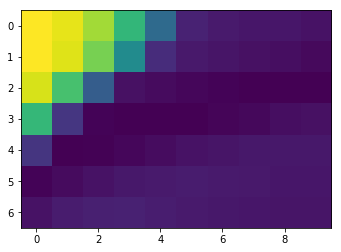

In [70]:
chisqr_image = plt.imshow(chi_sqr_arr)
# v = [xmin, xmax, ymin, ymax].
# axi = [0,9.5,0,6.5]
# plt.axis()
plt.show()